In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [8]:
df=pd.read_excel('PP_desercion.xlsx')

In [9]:
print("Primeras filas del dataset:")
print(df.head())

Primeras filas del dataset:
   Matricula  Edad    Sexo Carrera que cursas  Semestre actual Estado civil  \
0  222086342    23  Hombre                 LP                7   Soltero(a)   
1  221072501    24   Mujer                 LP                7   Soltero(a)   
2  202410478    28  Hombre               LCDN                3   Soltero(a)   
3  212005432    23   Mujer                 LP                7   Soltero(a)   
4  212078677    34   Mujer               LCYF                2   Soltero(a)   

  ¿Has pensado en abandonar tus estudios?  \
0                                      Sí   
1                                      No   
2                                      No   
3                                      No   
4                                      No   

  Si respondiste “Sí”, ¿Cuál es la principal razón?  \
0                                  Falta de interés   
1     Ninguna (en la anterior pregunta respondí no)   
2                                               NaN   
3     

In [10]:
#Eliminar columnas (Matricula)

In [11]:
if 'Matricula' in df.columns:
    df = df.drop(columns=['Matricula'])

In [12]:
#Renombrar las columnas

In [13]:
df = df.rename(columns={
    'Carrera que cursas': 'Carrera ',
    'Semestre actual': 'Semestre',
    'Estado civil': 'Estado_Civil',
    '¿Has pensado en abandonar tus estudios?': 'Riesgo_Abandono',
    'Si respondiste “Sí”, ¿Cuál es la principal razón?': 'Razon_Abandono',
    '¿Con qué frecuencia asistes a clases?': 'Frecuencia_Asistencia',
    '¿Qué tan satisfecho(a) estás con la calidad educativa de tu universidad?': 'Satisfaccion_Calidad',
    '¿Consideras que tus profesores te motivan a continuar tus estudios?': 'Motivacion_Prof',
    '¿Trabajas actualmente?': 'Trabaja',
    '¿Aproximadamente cuánto ganas al mes?': 'Ingreso_Propio',
    '¿Tus ingresos o los de tu familia son suficientes para cubrir tus gastos escolares?': 'Suficiencia_Ingreso',
    '¿Aproximadamente cuánto gana al mes tu familia?': 'Ingreso_Familiar',
    '¿En qué gastas principalmente tu dinero cada mes?': 'Gasto_Principal',
    '¿Cuentas con algún tipo de beca o apoyo económico?': 'Tiene_Beca',
    'En caso de contar con algún tipo de beca o apoyo, ¿de cuánto es el monto?': 'Monto_Beca',
    '¿Qué tan importante consideras el factor económico en tu permanencia escolar?': 'Importancia_Economica',
    '¿A qué distancia vives de la universidad?': 'Distancia',
    '¿Cuál es tu medio principal de transporte?': 'Transporte',
    '¿Consideras que la distancia o el transporte influyen en tu asistencia o rendimiento académico?': 'Influencia_Transporte',
    '¿Te sientes apoyado(a) por tu familia o amigos para continuar estudiando?': 'Apoyo_Social',
    '¿Has sentido estrés, ansiedad o desmotivación por cuestiones escolares?': 'Salud_Mental',
    '¿Cómo calificas tu sentido de pertenencia a la universidad?': 'Sentido_Pertenencia',
    'En una escala del 1 al 10, ¿Qué tan comprometido(a) te sientes con concluir tu carrera?': 'Nivel_Compromiso',
    '¿Conoces personas que hayan desertado de esta universidad?': 'Conoce_Desertores',
    '¿Cuales son las razones por las que abandonaron sus estudios?': 'Razon_Desercion_Terceros'
})

In [14]:
print(df.dtypes)

Edad                         int64
Sexo                        object
Carrera                     object
Semestre                     int64
Estado_Civil                object
Riesgo_Abandono             object
Razon_Abandono              object
Frecuencia_Asistencia       object
Satisfaccion_Calidad         int64
Motivacion_Prof             object
Trabaja                     object
Ingreso_Propio              object
Suficiencia_Ingreso         object
Ingreso_Familiar            object
Gasto_Principal             object
Tiene_Beca                  object
Monto_Beca                  object
Importancia_Economica        int64
Distancia                   object
Transporte                  object
Influencia_Transporte       object
Apoyo_Social                object
Salud_Mental                object
Sentido_Pertenencia         object
Nivel_Compromiso             int64
Conoce_Desertores           object
Razon_Desercion_Terceros    object
dtype: object


In [15]:
#Qué porcentaje desea irse?

/tmp/ipython-input-4281759184.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Riesgo_Abandono', data=df, palette='viridis')


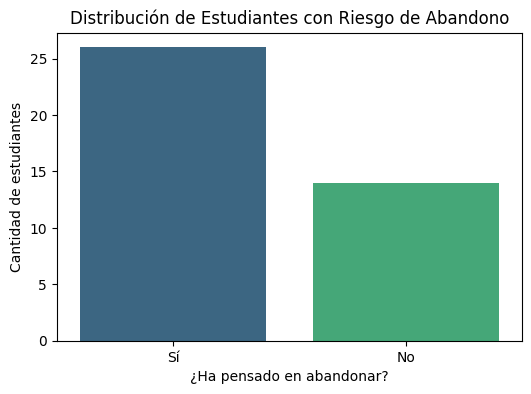

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Riesgo_Abandono', data=df, palette='viridis')
plt.title('Distribución de Estudiantes con Riesgo de Abandono')
plt.xlabel('¿Ha pensado en abandonar?')
plt.ylabel('Cantidad de estudiantes')
plt.show()

In [ ]:
#Cuáles son las razones principales?

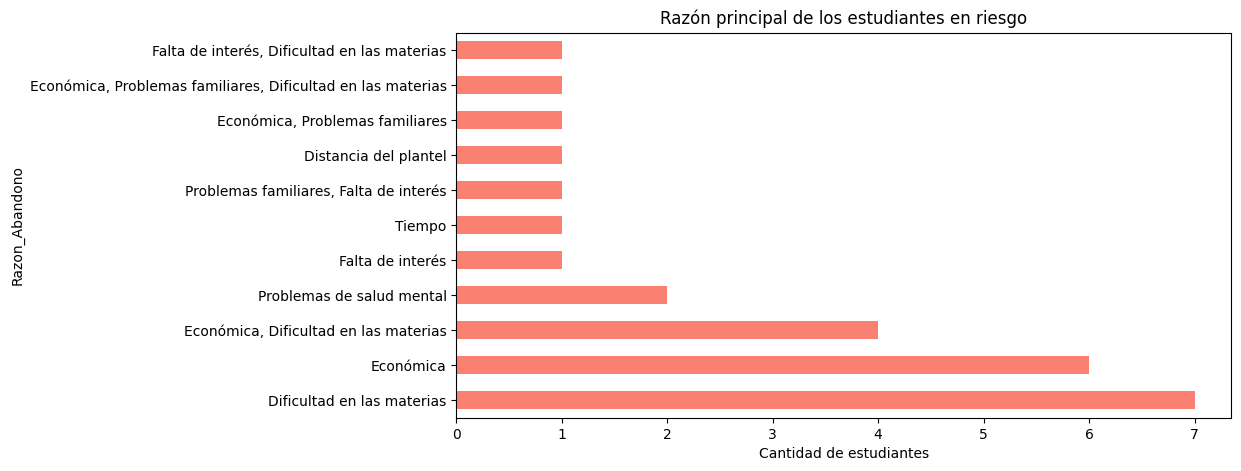

In [17]:
import matplotlib.pyplot as plt

# PASO 1: Filtrar
# Creamos una lista pequeña solo con los estudiantes que dijeron 'Sí' han pensado abandonar
solo_riesgo = df[df['Riesgo_Abandono'] == 'Sí']

# PASO 2: Contar
# Contamos cuántas veces se repite cada razón
conteo_razones = solo_riesgo['Razon_Abandono'].value_counts()

# PASO 3: Graficar
# 'barh' significa 'bar horizontal'
conteo_razones.plot(kind='barh', color='salmon', figsize=(10, 5))

plt.title('Razón principal de los estudiantes en riesgo')
plt.xlabel('Cantidad de estudiantes')
plt.show()

In [18]:
#Data frame con solo los estudiantes en riesgo

In [19]:
df_riesgo = df[df['Riesgo_Abandono'] == 'Sí']


In [20]:
def detectar_razon(texto, palabra_clave):
    if pd.isna(texto):
        return False
    return palabra_clave.lower() in str(texto).lower()

In [21]:
df_riesgo['Es_Economica'] = df_riesgo['Razon_Abandono'].apply(lambda x: detectar_razon(x, 'Económica'))
df_riesgo['Es_Dificultad'] = df_riesgo['Razon_Abandono'].apply(lambda x: detectar_razon(x, 'Dificultad'))

/tmp/ipython-input-2716490007.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_riesgo['Es_Economica'] = df_riesgo['Razon_Abandono'].apply(lambda x: detectar_razon(x, 'Económica'))
/tmp/ipython-input-2716490007.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_riesgo['Es_Dificultad'] = df_riesgo['Razon_Abandono'].apply(lambda x: detectar_razon(x, 'Dificultad'))


In [22]:
riesgo_por_carrera = df_riesgo.groupby('Carrera ').size().reset_index(name='Cantidad')


In [23]:
riesgo_academico_semestre = df_riesgo[df_riesgo['Es_Dificultad']]['Semestre'].value_counts().sort_index()

In [24]:
conteo_total = [df_riesgo['Es_Economica'].sum(), df_riesgo['Es_Dificultad'].sum()]

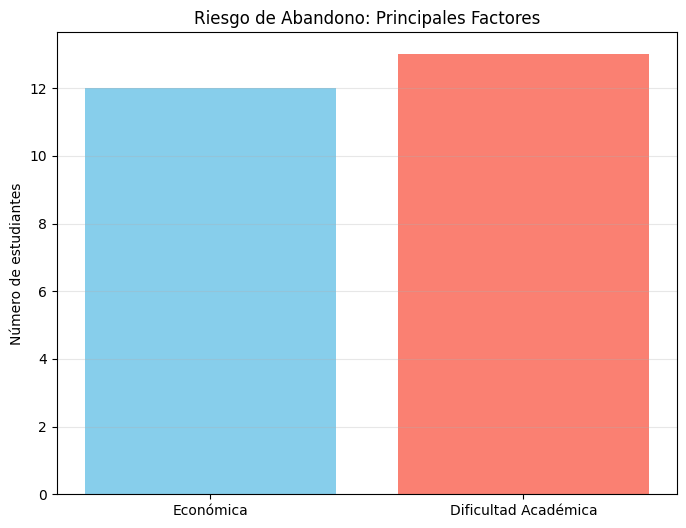

In [25]:
#Conteo total

plt.figure(figsize=(8, 6))
conteo = [df_riesgo['Es_Economica'].sum(), df_riesgo['Es_Dificultad'].sum()]
plt.bar(['Económica', 'Dificultad Académica'], conteo, color=['skyblue', 'salmon'])
plt.title('Riesgo de Abandono: Principales Factores')
plt.ylabel('Número de estudiantes')
plt.grid(axis='y', alpha=0.3) # Agrega líneas horizontales suaves
plt.savefig('grafico_factores_total.png') # Guarda la imagen
plt.show()

<Figure size 1000x600 with 0 Axes>

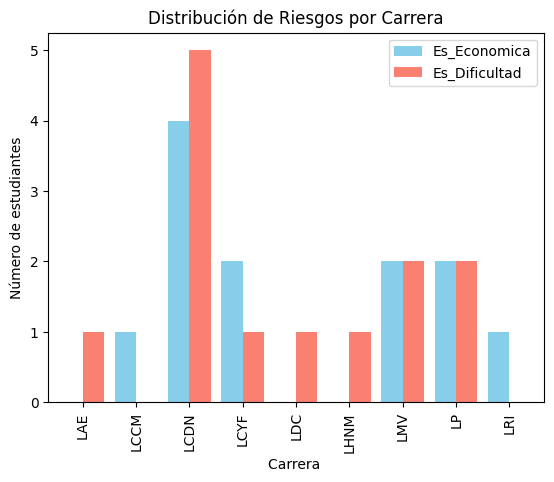

In [26]:
#Por carrera
riesgo_por_carrera = df_riesgo.groupby('Carrera ')[['Es_Economica', 'Es_Dificultad']].sum()
plt.figure(figsize=(10, 6))
riesgo_por_carrera.plot(kind='bar', color=['skyblue', 'salmon'], width=0.8)
plt.title('Distribución de Riesgos por Carrera')
plt.ylabel('Número de estudiantes')
plt.xlabel('Carrera ')
plt.show()

/tmp/ipython-input-3409696486.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Trabaja', data=df, palette='viridis')


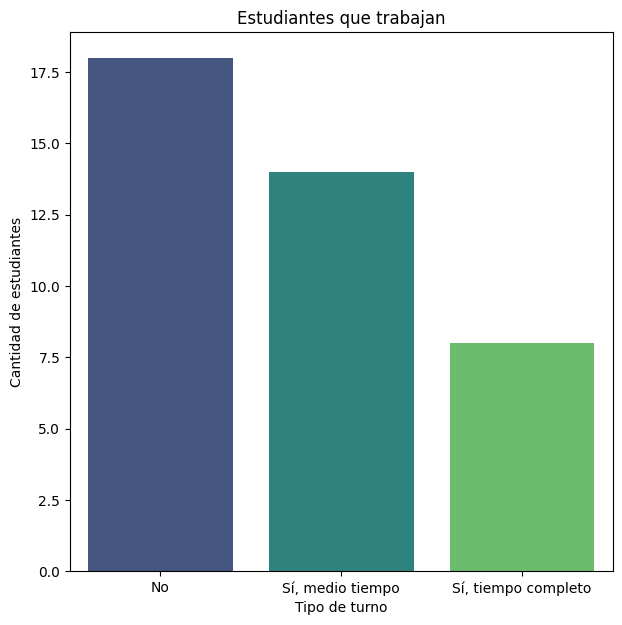

In [27]:
#Quiienes trabajan

plt.figure(figsize=(7,7))
sns.countplot(x='Trabaja', data=df, palette='viridis')
plt.title('Estudiantes que trabajan')
plt.xlabel('Tipo de turno')
plt.ylabel('Cantidad de estudiantes')
plt.show()

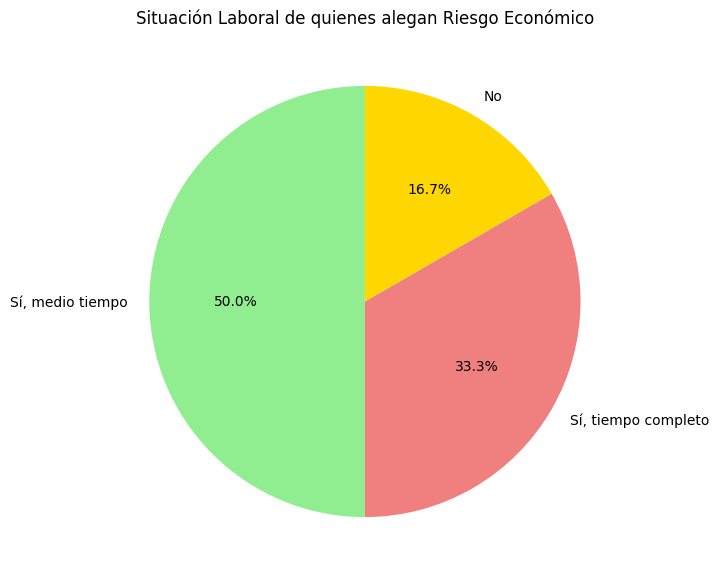

In [28]:
datos_pastel = df_riesgo[df_riesgo['Es_Economica']]['Trabaja'].value_counts()

plt.figure(figsize=(7, 7)) # Figura cuadrada para el pastel
plt.pie(datos_pastel, labels=datos_pastel.index, autopct='%1.1f%%',
colors=['lightgreen', 'lightcoral', 'gold'], startangle=90)
plt.title('Situación Laboral de quienes alegan Riesgo Económico')
plt.savefig('grafico_pastel_trabajo.png')
plt.show()

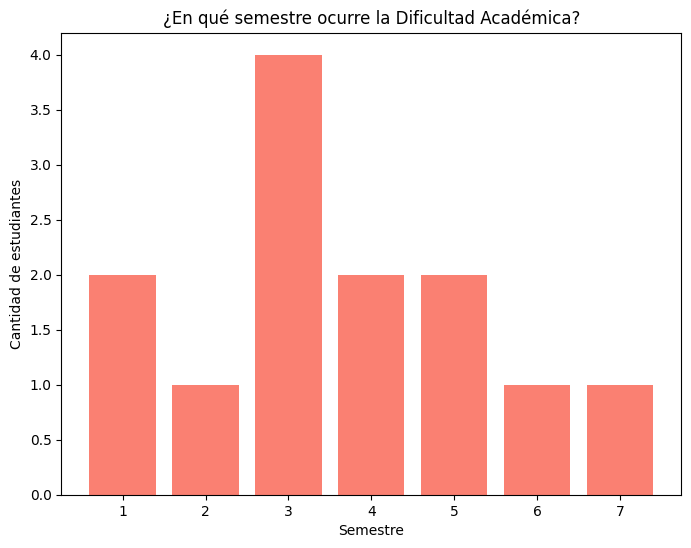

In [29]:
#Semestre en el que se presentan más dificultades

datos_semestre = df_riesgo[df_riesgo['Es_Dificultad']]['Semestre'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
plt.bar(datos_semestre.index.astype(str), datos_semestre.values, color='salmon')
plt.title('¿En qué semestre ocurre la Dificultad Académica?')
plt.xlabel('Semestre')
plt.ylabel('Cantidad de estudiantes')
plt.savefig('grafico_semestres.png')
plt.show()

In [30]:
#Relación con la salud mental

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_excel('PP_desercion.xlsx', sheet_name=0)


In [35]:
df = df.rename(columns={
    '¿Has sentido estrés, ansiedad o desmotivación por cuestiones escolares?': 'Nivel_Estres',
    '¿Has pensado en abandonar tus estudios?': 'Intencion_Abandono'
})
orden_logico = ['Nunca', 'Rara vez', 'Algunas veces', 'Frecuentemente']

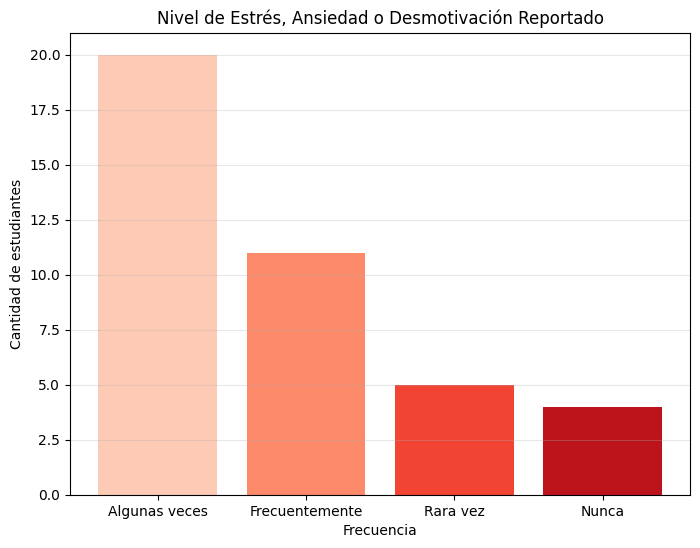

In [37]:
#Distribición en general

plt.figure(figsize=(8, 6))
# Filtrar para asegurar que solo usamos categorías que existen en los datos
conteo = df['Nivel_Estres'].value_counts()

plt.bar(conteo.index, conteo.values, color=sns.color_palette("Reds", len(orden_logico)))
plt.title('Nivel de Estrés, Ansiedad o Desmotivación Reportado')
plt.xlabel('Frecuencia')
plt.ylabel('Cantidad de estudiantes')
plt.grid(axis='y', alpha=0.3)
plt.show()

<Figure size 1000x600 with 0 Axes>

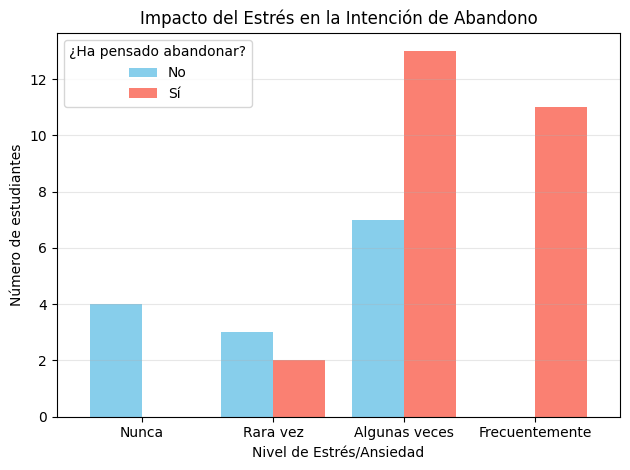

In [40]:
#Estrés vs Abandono
cruce = pd.crosstab(df['Nivel_Estres'], df['Intencion_Abandono'])
cruce = cruce.reindex(orden_logico)

plt.figure(figsize=(10, 6))
cruce.plot(kind='bar', color=['skyblue', 'salmon'], width=0.8)
plt.title('Impacto del Estrés en la Intención de Abandono')
plt.xlabel('Nivel de Estrés/Ansiedad')
plt.ylabel('Número de estudiantes')
plt.legend(title='¿Ha pensado abandonar?')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [41]:
#Convertir el riesgo a 0 y 1

In [42]:
#Semáforo

In [50]:
import pandas as pd

try:
    df = pd.read_excel('PP_desercion.xlsx', sheet_name=0)
except FileNotFoundError:
    print("No encuentro el archivo. Asegúrate de que está en la carpeta.")
    exit()

# Renombrar columnas
df = df.rename(columns={
    '¿Has pensado en abandonar tus estudios?': 'Intencion_Abandono',
    '¿Has sentido estrés, ansiedad o desmotivación por cuestiones escolares?': 'Nivel_Estres',
    '¿Trabajas actualmente?': 'Trabaja',
    'Carrera que cursas': 'Carrera'
})

# SISTEMA DE PUNTOS
def calcular_riesgo(fila):
    puntos = 0

    # Regla A: Intención directa
    if fila['Intencion_Abandono'] == 'Sí':
        puntos += 50

    # Regla B: Salud Mental
    estres_alto = ['Siempre', 'Frecuentemente']
    if fila['Nivel_Estres'] in estres_alto:
        puntos += 30
    elif fila['Nivel_Estres'] == 'Algunas veces':
        puntos += 15

    # Regla C: Factor Económico/Tiempo
    # Si trabaja, tiene menos tiempo
    if str(fila['Trabaja']).startswith('Sí'):
        puntos += 20

    return puntos

#  APLICAR EL CÁLCULO
df['Puntaje_Riesgo'] = df.apply(calcular_riesgo, axis=1)

# CREAR EL SEMÁFORO (Categoría)
def categorizar(puntos):
    if puntos >= 60:
        return '🔴 ALTO'
    elif puntos >= 30:
        return '🟡 MEDIO'
    else:
        return '🟢 BAJO'

df['Nivel_Alerta'] = df['Puntaje_Riesgo'].apply(categorizar)

# 5. GUARDAR
nombre_final = 'PP_desercion_SCORE_SIMPLE.xlsx'
df.to_excel(nombre_final, index=False)

# MOSTRAR RESULTADOS
print(f"Archivo guardado: {nombre_final}")
print("\n--- EJEMPLO NUEVO SEMÁFORO ---")
columnas_ver = ['Carrera', 'Intencion_Abandono', 'Nivel_Estres', 'Trabaja', 'Puntaje_Riesgo', 'Nivel_Alerta']
print(df[columnas_ver].head(10))

# Resumen rápido
print("\n--- RESUMEN DE ALUMNOS EN RIESGO ---")
print(df['Nivel_Alerta'].value_counts())

Archivo guardado: PP_desercion_SCORE_SIMPLE.xlsx

--- EJEMPLO NUEVO SEMÁFORO ---
  Carrera Intencion_Abandono    Nivel_Estres              Trabaja  \
0      LP                 Sí  Frecuentemente                   No   
1      LP                 No   Algunas veces     Sí, medio tiempo   
2    LCDN                 No   Algunas veces     Sí, medio tiempo   
3      LP                 No   Algunas veces                   No   
4    LCYF                 No           Nunca                   No   
5    LCYF                 Sí  Frecuentemente  Sí, tiempo completo   
6    LHNM                 No   Algunas veces  Sí, tiempo completo   
7    LCDN                 Sí  Frecuentemente                   No   
8    LCDN                 No   Algunas veces                   No   
9    LCDN                 Sí        Rara vez                   No   

   Puntaje_Riesgo Nivel_Alerta  
0              80       🔴 ALTO  
1              35      🟡 MEDIO  
2              35      🟡 MEDIO  
3              15       🟢 B

In [ ]:
#Matriz de correlación

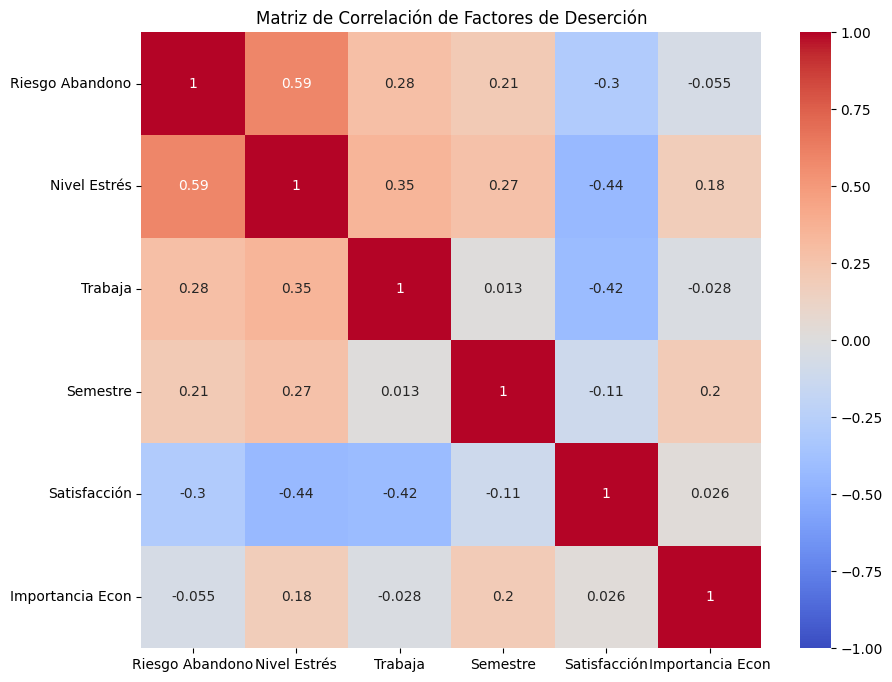

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. CARGAR
try:
    df = pd.read_excel('PP_desercion.xlsx', sheet_name=0)
except FileNotFoundError:
    print("Error: Archivo no encontrado.")
    exit()

# 2. CONVERTIR TEXTO A NÚMEROS (Paso obligatorio)

# A) Convertir Sí/No a 1/0
cols_binarias = ['¿Has pensado en abandonar tus estudios?', '¿Trabajas actualmente?']
for col in cols_binarias:
    # Si la respuesta empieza con "Sí" ponemos 1, si no 0
    df[col] = df[col].apply(lambda x: 1 if str(x).startswith('Sí') else 0)

# B) Convertir Escalas (Nunca -> Siempre) a 0, 1, 2...
mapa_escala = {
    'Nunca': 0, 'Rara vez': 1, 'Algunas veces': 2,
    'Casi siempre': 3, 'Frecuentemente': 4, 'Siempre': 4
}
# Aplicar a la columna de estrés
col_estres = '¿Has sentido estrés, ansiedad o desmotivación por cuestiones escolares?'
df[col_estres] = df[col_estres].map(mapa_escala).fillna(0)

# 3. SELECCIONAR Y RENOMBRAR VARIABLES
# Solo elegimos las que ya son números o las que acabamos de convertir
datos_matriz = df[[
    '¿Has pensado en abandonar tus estudios?',  # Ahora es 0 o 1
    col_estres,                                 # Ahora es 0 a 4
    '¿Trabajas actualmente?',                   # Ahora es 0 o 1
    'Semestre actual',                          # Ya era número
    '¿Qué tan satisfecho(a) estás con la calidad educativa de tu universidad?', # 1 a 5
    '¿Qué tan importante consideras el factor económico en tu permanencia escolar?' # 1 a 5
]]

# Renombrar para que el gráfico se vea bonito
datos_matriz.columns = ['Riesgo Abandono', 'Nivel Estrés', 'Trabaja', 'Semestre', 'Satisfacción', 'Importancia Econ']

# 4. CALCULAR Y GRAFICAR
# Usamos method='spearman' porque son datos de encuestas (rangos)
matriz = datos_matriz.corr(method='spearman')

plt.figure(figsize=(10, 8))
# annot=True pone los numeritos dentro de los cuadros
sns.heatmap(matriz, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación de Factores de Deserción')
plt.show()

In [47]:
#Modelo de regresión logistica

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

# 1. CARGAR DATOS
try:
    df = pd.read_excel('PP_desercion.xlsx', sheet_name=0)
except FileNotFoundError:
    print("¡Error! Asegúrate de que 'PP_desercion.xlsx' esté en la carpeta.")
    exit()

# 2. LIMPIEZA Y PREPARACIÓN
df = df.rename(columns={
    '¿Has pensado en abandonar tus estudios?': 'Riesgo_Abandono',
    '¿Has sentido estrés, ansiedad o desmotivación por cuestiones escolares?': 'Nivel_Estres',
    '¿Trabajas actualmente?': 'Trabaja',
    '¿Qué tan importante consideras el factor económico en tu permanencia escolar?': 'Importancia_Economica',
    'Semestre actual': 'Semestre'
})

# --- CONVERSIÓN DE DATOS

# A) Variable Objetivo (Target): Sí=1, No=0
df['Target'] = df['Riesgo_Abandono'].apply(lambda x: 1 if x == 'Sí' else 0)

# B) Variables Predictoras (Features)
# Mapa para el estrés (Escala ordinal)
mapa_estres = {'Nunca': 0, 'Rara vez': 1, 'Algunas veces': 2, 'Frecuentemente': 3, 'Siempre': 4}
df['Estres_Num'] = df['Nivel_Estres'].map(mapa_estres).fillna(0)

# Mapa para trabajo (Binario)
df['Trabaja_Num'] = df['Trabaja'].apply(lambda x: 1 if str(x).startswith('Sí') else 0)

# Rellenar nulos en numéricas (por seguridad)
df['Importancia_Economica'] = pd.to_numeric(df['Importancia_Economica'], errors='coerce').fillna(0)
df['Semestre'] = pd.to_numeric(df['Semestre'], errors='coerce').fillna(1)

# 3. ENTRENAMIENTO DEL MODELO
# Seleccionamos las variables que usarán para predecir
features = ['Estres_Num', 'Trabaja_Num', 'Importancia_Economica', 'Semestre']
X = df[features]
y = df['Target']

modelo = LogisticRegression()
modelo.fit(X, y)

# 4. CALCULAR LA PROBABILIDAD REAL (0 a 1)
# predict_proba nos da dos columnas: [Probabilidad de NO, Probabilidad de SÍ]
# Tomamos la columna [1] que es la del "SÍ"
probs = modelo.predict_proba(X)[:, 1]

# Asignamos al DataFrame
df['Probabilidad_Abandono'] = probs

# Convertir a porcentaje
df['Probabilidad_Pct'] = (df['Probabilidad_Abandono'] * 100).round(2)

# 5. GUARDAR RESULTADO
nombre_archivo = 'PP_desercion_con_probabilidad.xlsx'
df.to_excel(nombre_archivo, index=False)

print(f"¡Listo! Archivo guardado como: {nombre_archivo}")
print("\n--- EJEMPLO DE RESULTADOS ---")
print(df[['Riesgo_Abandono', 'Nivel_Estres', 'Probabilidad_Pct']].head(10))

# Mostrar los coeficientes (La "Importancia" teórica)
coefs = pd.DataFrame(modelo.coef_[0], index=features, columns=['Peso (Importancia)'])
print("\n--- PESO DE CADA FACTOR (TEORÍA) ---")
print(coefs.sort_values(by='Peso (Importancia)', ascending=False))

¡Listo! Archivo guardado como: PP_desercion_con_probabilidad.xlsx

--- EJEMPLO DE RESULTADOS ---
  Riesgo_Abandono    Nivel_Estres  Probabilidad_Pct
0              Sí  Frecuentemente             93.83
1              No   Algunas veces             70.27
2              No   Algunas veces             64.58
3              No   Algunas veces             66.64
4              No           Nunca             16.29
5              Sí  Frecuentemente             88.61
6              No   Algunas veces             72.80
7              Sí  Frecuentemente             87.52
8              No   Algunas veces             60.64
9              Sí        Rara vez             25.28

--- PESO DE CADA FACTOR (TEORÍA) ---
                       Peso (Importancia)
Estres_Num                       1.515790
Trabaja_Num                      0.168443
Semestre                         0.064915
Importancia_Economica           -0.513891


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


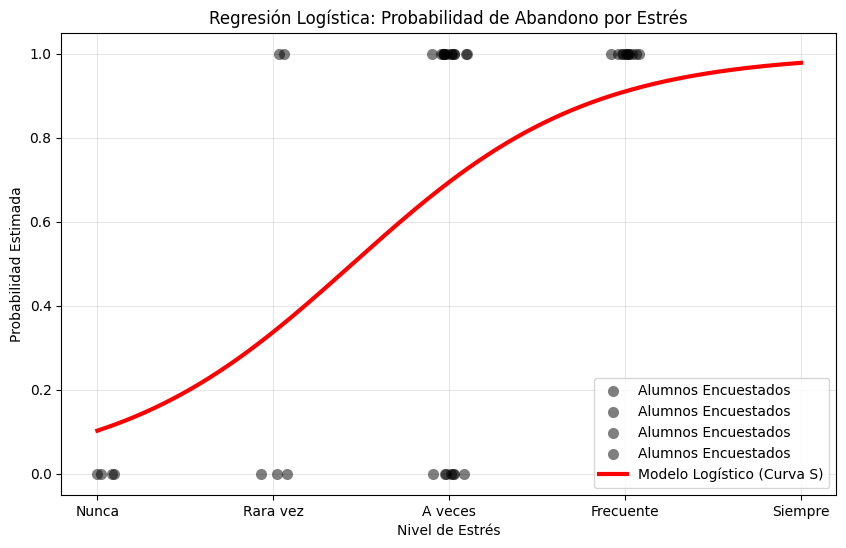

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# 1. Cargar y Preparar
try:
    df = pd.read_excel('PP_desercion.xlsx', sheet_name=0)
except:
    print("Carga tu archivo primero")
    exit()

# Convertir a números
df['Target'] = df['¿Has pensado en abandonar tus estudios?'].apply(lambda x: 1 if x == 'Sí' else 0)
mapa_estres = {'Nunca': 0, 'Rara vez': 1, 'Algunas veces': 2, 'Frecuentemente': 3, 'Siempre': 4}
df['Estres_Num'] = df['¿Has sentido estrés, ansiedad o desmotivación por cuestiones escolares?'].map(mapa_estres).fillna(0)

# 2. Entrenar Modelo (Solo con Estrés para poder graficar en 2D)
X = df[['Estres_Num']]
y = df['Target']
model = LogisticRegression()
model.fit(X, y)

# 3. Graficar
plt.figure(figsize=(10, 6))

# A) Puntos Reales (con un poco de ruido/jitter para que se vean mejor)
sns.stripplot(x=df['Estres_Num'], y=df['Target'], color='black', alpha=0.5, size=8, jitter=0.1, label='Alumnos Encuestados')

# B) La Curva Suave (Predicción)
X_test = np.linspace(0, 4, 300).reshape(-1, 1) # Creamos 300 puntos del 0 al 4
y_prob = model.predict_proba(X_test)[:, 1]     # Calculamos la probabilidad para cada punto
plt.plot(X_test, y_prob, color='red', linewidth=3, label='Modelo Logístico (Curva S)')

# Etiquetas
plt.title('Regresión Logística: Probabilidad de Abandono por Estrés')
plt.xlabel('Nivel de Estrés')
plt.ylabel('Probabilidad Estimada')
plt.xticks([0, 1, 2, 3, 4], ['Nunca', 'Rara vez', 'A veces', 'Frecuente', 'Siempre'])
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()